# 🧠 Heart Disease Prediction with Neural Network (Keras)

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart_cleveland_upload.csv to heart_cleveland_upload.csv


In [ ]:
# Load and prepare data
heart_model = pd.read_csv('heart_cleveland_upload.csv')
heart_model.rename(columns={'condition': 'target'}, inplace=True)
heart_model.head()
# Rename columns to more descriptive names
heart_model.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_EKG_results',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercised_induce_angina'
}, inplace=True)

In [ ]:
# Use all features except target

X = heart_model.drop('target', axis=1)
y = heart_model['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# Logistic Regression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("ROC AUC:", roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1]))

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60

ROC AUC: 0.8415178571428571


In [ ]:
# Random Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60

ROC AUC: 0.8470982142857143


In [ ]:
#  Neural Network
nn = Sequential()
nn.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
nn.add(Dropout(0.2))
nn.add(Dense(units=16, activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(units=1, activation='sigmoid'))

nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = nn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1)

# Evaluate
loss, accuracy = nn.evaluate(X_test, y_test)
print(f"Neural Network Test Accuracy: {accuracy:.2f}")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.5433 - loss: 0.7321 - val_accuracy: 0.5833 - val_loss: 0.6906
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6006 - loss: 0.6950 - val_accuracy: 0.6167 - val_loss: 0.6627
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6701 - loss: 0.6501 - val_accuracy: 0.7333 - val_loss: 0.6335
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7238 - loss: 0.6242 - val_accuracy: 0.7833 - val_loss: 0.6041
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7235 - loss: 0.5879 - val_accuracy: 0.7500 - val_loss: 0.5808
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8208 - loss: 0.5380 - val_accuracy: 0.7333 - val_loss: 0.5616
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8006 - loss: 0.5200 - val_accuracy: 0.7500 - val_loss: 0.5460
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7822 - loss: 0.4777 - val_accuracy: 0.7833 - val_loss:

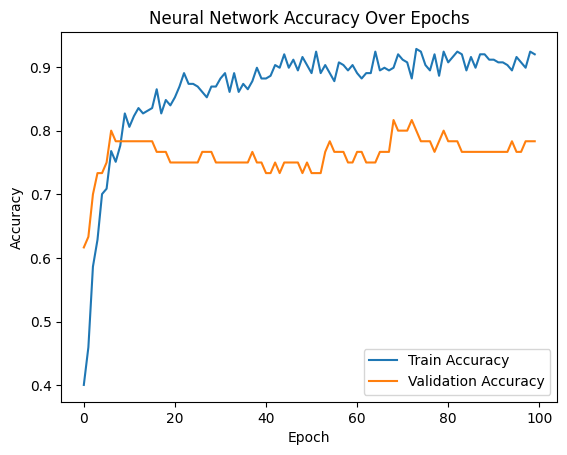

In [ ]:
# Neural Network Accuracy Plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Neural Network Accuracy Over Epochs')
plt.legend()
plt.show()

In [ ]:
# Export to CSV for SQL

heart_model.to_csv('heart_disease_predictions_full.csv', index=False)
print("Exported to 'heart_disease_predictions_full.csv'")

Exported to 'heart_disease_predictions_full.csv'


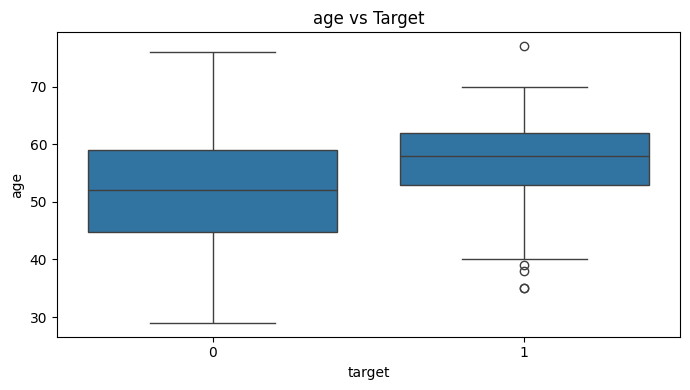

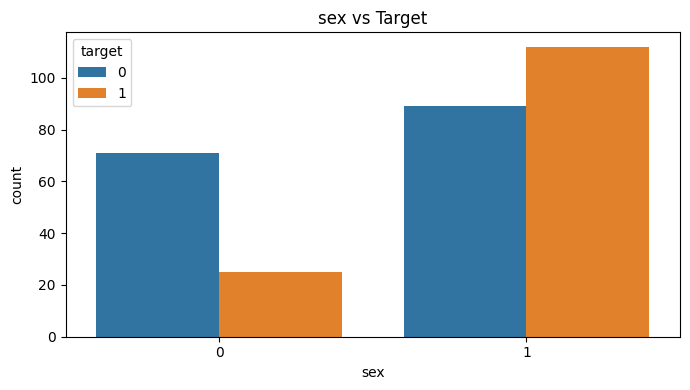

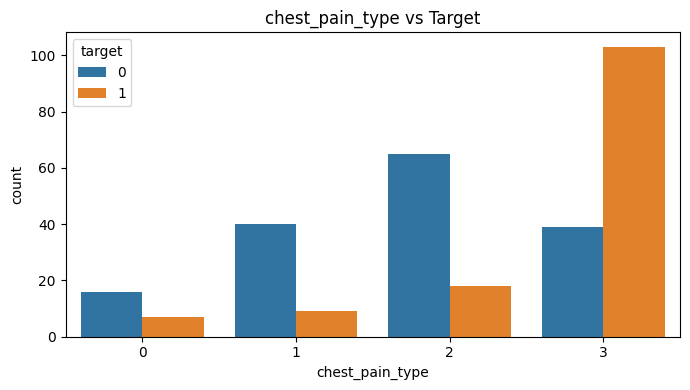

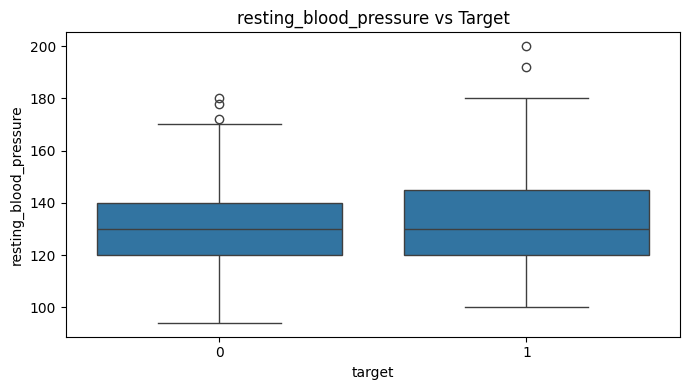

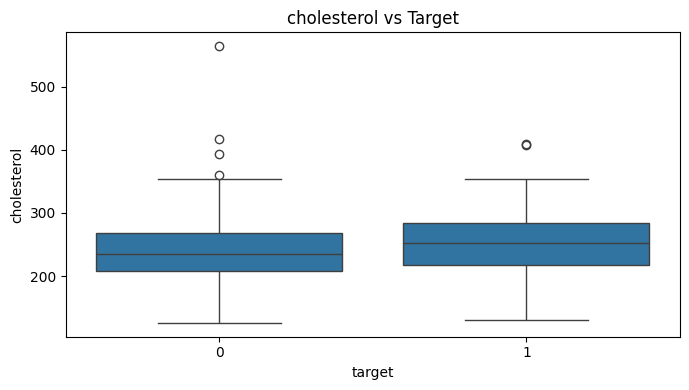

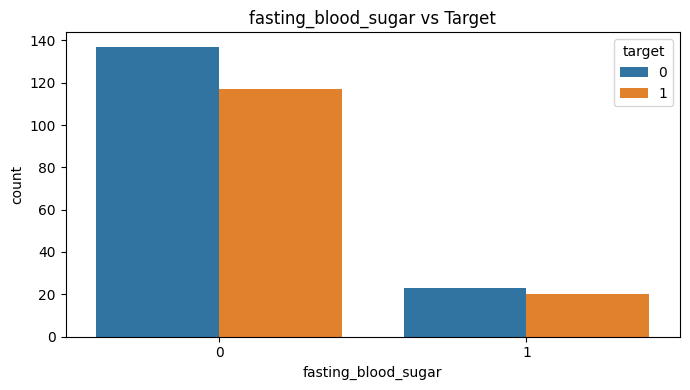

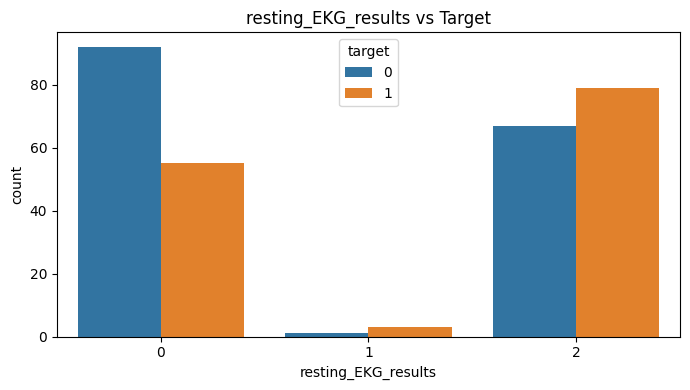

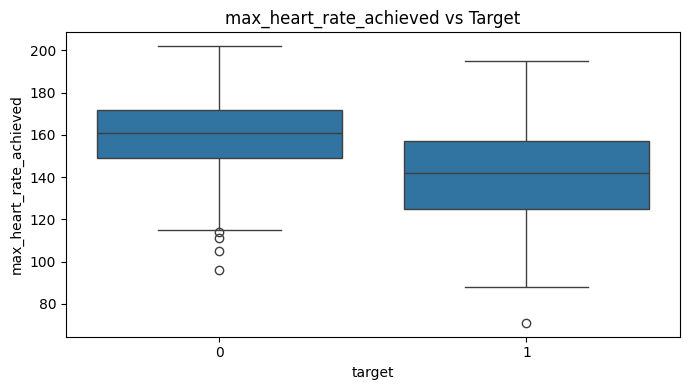

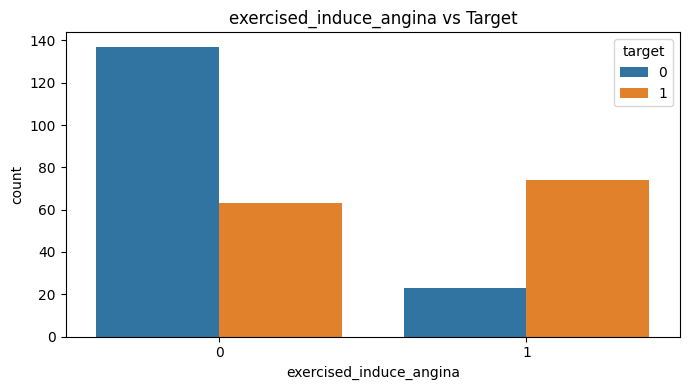

In [ ]:
# Plot Results

import matplotlib.pyplot as plt
import seaborn as sns

# Renamed columns if not already done
heart_model.rename(columns={
    'cp': 'chest_pain_type',
    'trestbps': 'resting_blood_pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting_blood_sugar',
    'restecg': 'resting_EKG_results',
    'thalach': 'max_heart_rate_achieved',
    'exang': 'exercised_induce_angina',
    'condition': 'target'
}, inplace=True)

# Feature list
features = [
    'age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
    'cholesterol', 'fasting_blood_sugar', 'resting_EKG_results',
    'max_heart_rate_achieved', 'exercised_induce_angina'
]

# Plot each feature against target
for feature in features:
    plt.figure(figsize=(7, 4))
    if heart_model[feature].nunique() <= 10 and heart_model[feature].dtype in ['int64', 'int32']:
        sns.countplot(data=heart_model, x=feature, hue='target')
    else:
        sns.boxplot(x='target', y=feature, data=heart_model)
    plt.title(f"{feature} vs Target")
    plt.tight_layout()
    plt.show()
